In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [9]:
df1 = pd.read_excel('/content/drive/MyDrive/data_station/Data05.xlsx', skiprows=1)
df1.head()

,구분,0,카테고리명,자재그룹,자재그룹명,제품코드,제품명,Unnamed: 7,판매,2019-12-01 00:00:00,...,2019-12-01 00:00:00.2,2020-10-01 00:00:00.2,2020-11-01 00:00:00.2,2020-12-01 00:00:00.2,2019-12-01 00:00:00.3,2020-10-01 00:00:00.3,2020-11-01 00:00:00.3,2020-12-01 00:00:00.3,안전재고,분류
0,구분,501,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,천원,0.0,0.0,...,98.8,0.0,0.0,0.0,98.8,0.0,0.0,0.0,0.0,E
1,구분,501,SSA,6132,청렴세제 오리지널,6073719,18청렴세제 1.5KG카툰,천원,0.0,0.0,...,393.7,0.0,0.0,0.0,393.7,0.0,0.0,0.0,0.0,E
2,구분,501,SSA,6132,청렴세제 오리지널,6075268,19청렴세제드럼 2.5KG리필,천원,10354.1,9474.3,...,6.4,0.0,6.4,0.0,9480.7,9741.7,6972.0,3368.2,0.0,A
3,구분,501,SSA,6132,청렴세제 오리지널,6075269,19청렴세제드럼 2.8KG카톤,천원,3543.3,7702.6,...,7.7,10.2,0.0,10.2,7710.3,6127.3,4009.9,2680.1,0.0,A
4,구분,501,SSA,6132,청렴세제 오리지널,6075270,19청렴세제 5.5KG리필,천원,234603.9,56309.6,...,293.0,0.0,0.0,277.2,56602.6,78268.0,74942.2,84967.2,39593.3,A


In [12]:
df1.shape

(93, 27)

In [11]:
df1.columns

Index([                   '구분',                       0,
                       '카테고리명',                  '자재그룹',
                       '자재그룹명',                  '제품코드',
                         '제품명',            'Unnamed: 7',
                          '판매',     2019-12-01 00:00:00,
           2020-10-01 00:00:00,     2020-11-01 00:00:00,
           2020-12-01 00:00:00, '2019-12-01 00:00:00.1',
       '2020-10-01 00:00:00.1', '2020-11-01 00:00:00.1',
       '2020-12-01 00:00:00.1', '2019-12-01 00:00:00.2',
       '2020-10-01 00:00:00.2', '2020-11-01 00:00:00.2',
       '2020-12-01 00:00:00.2', '2019-12-01 00:00:00.3',
       '2020-10-01 00:00:00.3', '2020-11-01 00:00:00.3',
       '2020-12-01 00:00:00.3',                  '안전재고',
                         ' 분류'],
      dtype='object')

In [ ]:
df1.iloc[:, 8:-2].T

In [26]:
df2 = df1.iloc[:, 8:-2]

In [27]:
df2.stack()

0   판매                            0.0
    2019-12-01 00:00:00           0.0
    2020-10-01 00:00:00           0.0
    2020-11-01 00:00:00           0.0
    2020-12-01 00:00:00           0.0
                               ...   
92  2020-12-01 00:00:00.2       425.6
    2019-12-01 00:00:00.3     41457.5
    2020-10-01 00:00:00.3    107175.6
    2020-11-01 00:00:00.3    110209.3
    2020-12-01 00:00:00.3     44002.2
Length: 1581, dtype: float64

In [39]:
pd.DataFrame(df2.stack()).reset_index().iloc[1:] # 날짜별로 재고량을 볼 수 있다.

,level_0,level_1,0
1,0,2019-12-01 00:00:00,0.0
2,0,2020-10-01 00:00:00,0.0
3,0,2020-11-01 00:00:00,0.0
4,0,2020-12-01 00:00:00,0.0
5,0,2019-12-01 00:00:00.1,0.0
...,...,...,...
1576,92,2020-12-01 00:00:00.2,425.6
1577,92,2019-12-01 00:00:00.3,41457.5
1578,92,2020-10-01 00:00:00.3,107175.6
1579,92,2020-11-01 00:00:00.3,110209.3


In [46]:
df3 = df1.iloc[:, 6:-2].drop(columns=['Unnamed: 7', '판매'])
df3.stack()


0   제품명                      18청렴세제 리필4KG(GS리테일마
    2019-12-01 00:00:00                      0.0
    2020-10-01 00:00:00                      0.0
    2020-11-01 00:00:00                      0.0
    2020-12-01 00:00:00                      0.0
                                    ...         
92  2020-12-01 00:00:00.2                  425.6
    2019-12-01 00:00:00.3                41457.5
    2020-10-01 00:00:00.3               107175.6
    2020-11-01 00:00:00.3               110209.3
    2020-12-01 00:00:00.3                44002.2
Length: 1581, dtype: object

In [55]:
df4 = pd.DataFrame(df3.set_index(['제품명']).stack()).reset_index()
df4.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


,제품명,level_1,0
0,18청렴세제 리필4KG(GS리테일마,2019-12-01,0.0
1,18청렴세제 리필4KG(GS리테일마,2020-10-01,0.0


In [57]:
df5 = df4.rename(columns={'level_1' : '날짜', 0:'재고량'})

In [60]:
df1.columns

Index([                   '구분',                       0,
                       '카테고리명',                  '자재그룹',
                       '자재그룹명',                  '제품코드',
                         '제품명',            'Unnamed: 7',
                          '판매',     2019-12-01 00:00:00,
           2020-10-01 00:00:00,     2020-11-01 00:00:00,
           2020-12-01 00:00:00, '2019-12-01 00:00:00.1',
       '2020-10-01 00:00:00.1', '2020-11-01 00:00:00.1',
       '2020-12-01 00:00:00.1', '2019-12-01 00:00:00.2',
       '2020-10-01 00:00:00.2', '2020-11-01 00:00:00.2',
       '2020-12-01 00:00:00.2', '2019-12-01 00:00:00.3',
       '2020-10-01 00:00:00.3', '2020-11-01 00:00:00.3',
       '2020-12-01 00:00:00.3',                  '안전재고',
                         ' 분류'],
      dtype='object')

In [62]:
df6 = df1[['카테고리명', '자재그룹', '자재그룹명', '제품코드', '제품명', '안전재고', ' 분류']]

In [72]:
df7 = pd.merge(df6, df5, how='right', on='제품명')
df7.to_excel('total_data.xlsx')

In [73]:
df7['날짜(전처리)'] = pd.to_datetime(df7['날짜'])

In [74]:
df7['공급월'] = df7['날짜(전처리)'].dt.month

In [83]:
p1 = pd.pivot_table(data=df7, index='공급월', values='재고량', aggfunc='sum').reset_index()

In [84]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

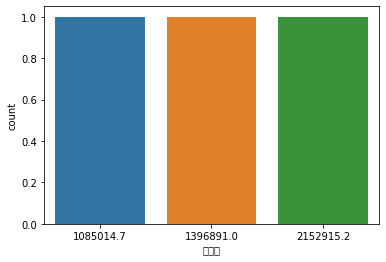

In [87]:
sns.countplot(data=p1, x='재고량')

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

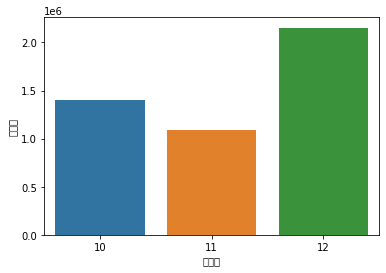

In [95]:
sns.barplot(data=df7, x='공급월', y='재고량', ci=None, estimator=sum)